In [24]:
# Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("azure_demand_cleaned.csv")

df.head()

,time_stamp,region,service_type,usage_units,provisioned_capacity,cost_usd,availability_pct,economic_indicator_index,market_demand_index,product_launch_impact
0,2021-01-01,East Us,Compute,634.35,675.97,76.12,97.64,95.65,90.49,0
1,2021-01-01,East Us,Storage,508.46,577.93,40.68,99.20,95.65,90.49,0
2,2021-01-01,West Europe,Compute,549.87,587.36,74.83,98.23,95.65,90.49,0
3,2021-01-01,West Europe,Storage,441.05,486.25,35.28,98.20,95.65,90.49,0
4,2021-01-01,Central India,Compute,725.42,782.89,87.05,98.59,95.65,90.49,0


In [2]:
# Basic Structuring for Time Series
df["time_stamp"] = pd.to_datetime(df["time_stamp"])

df = df.sort_values(["region", "service_type", "time_stamp"])

df = df.reset_index(drop=True)

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time_stamp                379 non-null    datetime64[ns]
 1   region                    379 non-null    object        
 2   service_type              379 non-null    object        
 3   usage_units               379 non-null    float64       
 4   provisioned_capacity      379 non-null    float64       
 5   cost_usd                  379 non-null    float64       
 6   availability_pct          379 non-null    float64       
 7   economic_indicator_index  379 non-null    float64       
 8   market_demand_index       379 non-null    float64       
 9   product_launch_impact     379 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 29.7+ KB


(379, 10)

In [3]:
# Seasonality Features
df["year"] = df["time_stamp"].dt.year
df["month"] = df["time_stamp"].dt.month
df["quarter"] = df["time_stamp"].dt.quarter
df["week_of_year"] = df["time_stamp"].dt.isocalendar().week.astype(int)

df["is_month_start"] = df["time_stamp"].dt.is_month_start.astype(int)
df["is_month_end"] = df["time_stamp"].dt.is_month_end.astype(int)
df

,time_stamp,region,service_type,usage_units,provisioned_capacity,cost_usd,availability_pct,economic_indicator_index,market_demand_index,product_launch_impact,year,month,quarter,week_of_year,is_month_start,is_month_end
0,2021-01-01,Central India,Compute,725.42,782.89,87.05,98.59,95.65,90.49,0,2021,1,1,53,1,0
1,2021-01-15,Central India,Compute,760.45,805.20,91.25,97.61,95.10,90.37,0,2021,1,1,2,0,0
2,2021-02-01,Central India,Compute,765.39,861.89,91.85,99.35,95.46,91.69,0,2021,2,1,5,1,0
3,2021-02-15,Central India,Compute,729.85,775.09,87.58,99.76,95.40,90.80,0,2021,2,1,7,0,0
4,2021-03-01,Central India,Compute,797.63,840.76,95.72,99.13,96.23,93.77,0,2021,3,1,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2022-10-15,West Europe,Storage,652.28,729.91,52.18,98.79,103.97,103.87,0,2022,10,4,41,0,0
375,2022-11-01,West Europe,Storage,670.76,738.89,53.66,98.69,104.30,103.55,0,2022,11,4,44,1,0
376,2022-11-15,West Europe,Storage,671.19,738.73,53.70,97.75,104.19,104.45,0,2022,11,4,46,0,0
377,2022-12-01,West Europe,Storage,663.30,745.13,53.06,97.53,104.41,104.54,0,2022,12,4,48,1,0


In [4]:
#  Lag Features
df["lag_1"] = df.groupby(["region", "service_type"])["usage_units"].shift(1)
df["lag_2"] = df.groupby(["region", "service_type"])["usage_units"].shift(2)
df["lag_4"] = df.groupby(["region", "service_type"])["usage_units"].shift(4)
df["lag_8"] = df.groupby(["region", "service_type"])["usage_units"].shift(8)
df

,time_stamp,region,service_type,usage_units,provisioned_capacity,cost_usd,availability_pct,economic_indicator_index,market_demand_index,product_launch_impact,year,month,quarter,week_of_year,is_month_start,is_month_end,lag_1,lag_2,lag_4,lag_8
0,2021-01-01,Central India,Compute,725.42,782.89,87.05,98.59,95.65,90.49,0,2021,1,1,53,1,0,NaN,NaN,NaN,NaN
1,2021-01-15,Central India,Compute,760.45,805.20,91.25,97.61,95.10,90.37,0,2021,1,1,2,0,0,725.42,NaN,NaN,NaN
2,2021-02-01,Central India,Compute,765.39,861.89,91.85,99.35,95.46,91.69,0,2021,2,1,5,1,0,760.45,725.42,NaN,NaN
3,2021-02-15,Central India,Compute,729.85,775.09,87.58,99.76,95.40,90.80,0,2021,2,1,7,0,0,765.39,760.45,NaN,NaN
4,2021-03-01,Central India,Compute,797.63,840.76,95.72,99.13,96.23,93.77,0,2021,3,1,9,1,0,729.85,765.39,725.42,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2022-10-15,West Europe,Storage,652.28,729.91,52.18,98.79,103.97,103.87,0,2022,10,4,41,0,0,686.18,612.07,608.02,568.13
375,2022-11-01,West Europe,Storage,670.76,738.89,53.66,98.69,104.30,103.55,0,2022,11,4,44,1,0,652.28,686.18,606.82,614.40
376,2022-11-15,West Europe,Storage,671.19,738.73,53.70,97.75,104.19,104.45,0,2022,11,4,46,0,0,670.76,652.28,612.07,579.81
377,2022-12-01,West Europe,Storage,663.30,745.13,53.06,97.53,104.41,104.54,0,2022,12,4,48,1,0,671.19,670.76,686.18,572.93


In [5]:
# Rolling Statistics
df["rolling_mean_3"] = df.groupby(["region", "service_type"])["usage_units"].transform(lambda x: x.rolling(3).mean())

df["rolling_mean_6"] = df.groupby(["region", "service_type"])["usage_units"].transform(lambda x: x.rolling(6).mean())

df["rolling_std_3"] = df.groupby(["region", "service_type"])["usage_units"].transform(lambda x: x.rolling(3).std())

df["rolling_std_6"] = df.groupby(["region", "service_type"])["usage_units"].transform(lambda x: x.rolling(6).std())
df

,time_stamp,region,service_type,usage_units,provisioned_capacity,cost_usd,availability_pct,economic_indicator_index,market_demand_index,product_launch_impact,...,is_month_start,is_month_end,lag_1,lag_2,lag_4,lag_8,rolling_mean_3,rolling_mean_6,rolling_std_3,rolling_std_6
0,2021-01-01,Central India,Compute,725.42,782.89,87.05,98.59,95.65,90.49,0,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-15,Central India,Compute,760.45,805.20,91.25,97.61,95.10,90.37,0,...,0,0,725.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-01,Central India,Compute,765.39,861.89,91.85,99.35,95.46,91.69,0,...,1,0,760.45,725.42,NaN,NaN,750.420000,NaN,21.791074,NaN
3,2021-02-15,Central India,Compute,729.85,775.09,87.58,99.76,95.40,90.80,0,...,0,0,765.39,760.45,NaN,NaN,751.896667,NaN,19.252079,NaN
4,2021-03-01,Central India,Compute,797.63,840.76,95.72,99.13,96.23,93.77,0,...,1,0,729.85,765.39,725.42,NaN,764.290000,NaN,33.903386,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2022-10-15,West Europe,Storage,652.28,729.91,52.18,98.79,103.97,103.87,0,...,0,0,686.18,612.07,608.02,568.13,650.176667,623.050000,37.099744,39.904081
375,2022-11-01,West Europe,Storage,670.76,738.89,53.66,98.69,104.30,103.55,0,...,1,0,652.28,686.18,606.82,614.40,669.740000,639.355000,16.973002,35.016539
376,2022-11-15,West Europe,Storage,671.19,738.73,53.70,97.75,104.19,104.45,0,...,0,0,670.76,652.28,612.07,579.81,664.743333,649.883333,10.795704,33.158107
377,2022-12-01,West Europe,Storage,663.30,745.13,53.06,97.53,104.41,104.54,0,...,1,0,671.19,670.76,686.18,572.93,668.416667,659.296667,4.436376,25.656155


In [6]:
# Capacity Utilization
df["capacity_utilization"] = df["usage_units"] / df["provisioned_capacity"]

In [7]:
# Demand Growth Rate
df["growth_rate_1"] = df.groupby(["region", "service_type"])["usage_units"].pct_change(1)

df["growth_rate_4"] = df.groupby(["region", "service_type"])["usage_units"].pct_change(4)
df

,time_stamp,region,service_type,usage_units,provisioned_capacity,cost_usd,availability_pct,economic_indicator_index,market_demand_index,product_launch_impact,...,lag_2,lag_4,lag_8,rolling_mean_3,rolling_mean_6,rolling_std_3,rolling_std_6,capacity_utilization,growth_rate_1,growth_rate_4
0,2021-01-01,Central India,Compute,725.42,782.89,87.05,98.59,95.65,90.49,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.926592,NaN,NaN
1,2021-01-15,Central India,Compute,760.45,805.20,91.25,97.61,95.10,90.37,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944424,0.048289,NaN
2,2021-02-01,Central India,Compute,765.39,861.89,91.85,99.35,95.46,91.69,0,...,725.42,NaN,NaN,750.420000,NaN,21.791074,NaN,0.888037,0.006496,NaN
3,2021-02-15,Central India,Compute,729.85,775.09,87.58,99.76,95.40,90.80,0,...,760.45,NaN,NaN,751.896667,NaN,19.252079,NaN,0.941633,-0.046434,NaN
4,2021-03-01,Central India,Compute,797.63,840.76,95.72,99.13,96.23,93.77,0,...,765.39,725.42,NaN,764.290000,NaN,33.903386,NaN,0.948701,0.092868,0.099542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2022-10-15,West Europe,Storage,652.28,729.91,52.18,98.79,103.97,103.87,0,...,612.07,608.02,568.13,650.176667,623.050000,37.099744,39.904081,0.893644,-0.049404,0.072794
375,2022-11-01,West Europe,Storage,670.76,738.89,53.66,98.69,104.30,103.55,0,...,686.18,606.82,614.40,669.740000,639.355000,16.973002,35.016539,0.907794,0.028331,0.105369
376,2022-11-15,West Europe,Storage,671.19,738.73,53.70,97.75,104.19,104.45,0,...,652.28,612.07,579.81,664.743333,649.883333,10.795704,33.158107,0.908573,0.000641,0.096590
377,2022-12-01,West Europe,Storage,663.30,745.13,53.06,97.53,104.41,104.54,0,...,670.76,686.18,572.93,668.416667,659.296667,4.436376,25.656155,0.890180,-0.011755,-0.033344


In [8]:
# Spike Deduction
df["spike_flag"] = 0

condition = df["usage_units"] > (df["rolling_mean_3"] + 2 * df["rolling_std_3"])

df.loc[condition, "spike_flag"] = 1


In [9]:
print(df.shape)

(379, 28)


In [10]:
#  Handling The NAN Values 
df = df.dropna().reset_index(drop=True)

df.isnull().sum()

time_stamp                  0
region                      0
service_type                0
usage_units                 0
provisioned_capacity        0
cost_usd                    0
availability_pct            0
economic_indicator_index    0
market_demand_index         0
product_launch_impact       0
year                        0
month                       0
quarter                     0
week_of_year                0
is_month_start              0
is_month_end                0
lag_1                       0
lag_2                       0
lag_4                       0
lag_8                       0
rolling_mean_3              0
rolling_mean_6              0
rolling_std_3               0
rolling_std_6               0
capacity_utilization        0
growth_rate_1               0
growth_rate_4               0
spike_flag                  0
dtype: int64

In [11]:
print(df.shape)

(315, 28)


In [12]:
# Categorical Encoding
region_dummies = pd.get_dummies(df["region"], prefix="region", drop_first=True)
service_dummies = pd.get_dummies(df["service_type"], prefix="service", drop_first=True)

df = pd.concat([df, region_dummies, service_dummies], axis=1)

In [13]:
df.to_csv("feature_engineered_dataset.csv", index=False)

df.head()

,time_stamp,region,service_type,usage_units,provisioned_capacity,cost_usd,availability_pct,economic_indicator_index,market_demand_index,product_launch_impact,...,rolling_std_3,rolling_std_6,capacity_utilization,growth_rate_1,growth_rate_4,spike_flag,region_East Us,region_Southeast Asia,region_West Europe,service_Storage
0,2021-05-01,Central India,Compute,852.50,929.99,102.30,97.88,97.03,92.14,0,...,14.711418,45.315538,0.916677,0.004122,0.068791,0,False,False,False,False
1,2021-05-15,Central India,Compute,822.77,869.71,98.73,97.56,97.63,92.43,0,...,16.248773,20.091600,0.946028,-0.034874,-0.000644,0,False,False,False,False
2,2021-06-01,Central India,Compute,854.46,928.97,102.54,98.32,97.54,93.10,1,...,17.757489,15.541441,0.919793,0.038516,0.035144,0,False,False,False,False
3,2021-06-15,Central India,Compute,838.37,892.28,100.60,98.98,97.56,93.50,1,...,15.845631,13.831053,0.939582,-0.018831,-0.012521,0,False,False,False,False
4,2021-07-01,Central India,Compute,871.84,921.87,104.62,99.83,97.44,94.03,1,...,16.739143,16.495270,0.945730,0.039923,0.022686,0,False,False,False,False


In [14]:
print(df.shape)
print(df.columns)

(315, 32)
Index(['time_stamp', 'region', 'service_type', 'usage_units',
       'provisioned_capacity', 'cost_usd', 'availability_pct',
       'economic_indicator_index', 'market_demand_index',
       'product_launch_impact', 'year', 'month', 'quarter', 'week_of_year',
       'is_month_start', 'is_month_end', 'lag_1', 'lag_2', 'lag_4', 'lag_8',
       'rolling_mean_3', 'rolling_mean_6', 'rolling_std_3', 'rolling_std_6',
       'capacity_utilization', 'growth_rate_1', 'growth_rate_4', 'spike_flag',
       'region_East Us', 'region_Southeast Asia', 'region_West Europe',
       'service_Storage'],
      dtype='object')


In [15]:
print(df["region"].unique())
print(df["service_type"].unique())

['Central India' 'East Us' 'Southeast Asia' 'West Europe']
['Compute' 'Storage']


In [16]:
subset = df[(df["region"]=="East-US") & (df["service_type"]=="Compute")]
print(subset.shape)

(0, 32)


In [17]:
subset = df[(df["region"]=="East US") & (df["service_type"]=="Compute")]

Subset shape: (40, 32)


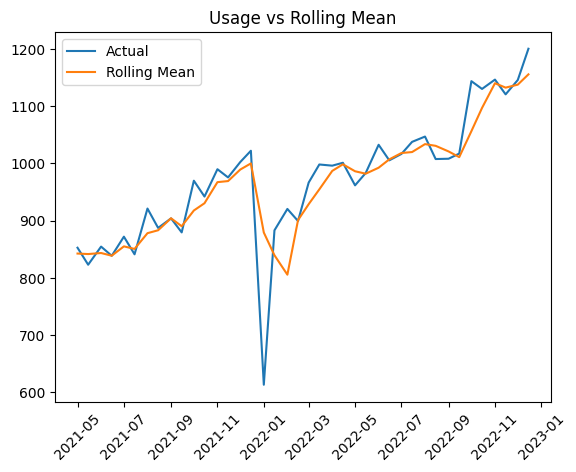

In [18]:
region_name = df["region"].iloc[0]
service_name = df["service_type"].iloc[0]

subset = df[(df["region"]==region_name) & 
            (df["service_type"]==service_name)]

print("Subset shape:", subset.shape)

plt.figure()
plt.plot(subset["time_stamp"], subset["usage_units"], label="Actual")
plt.plot(subset["time_stamp"], subset["rolling_mean_3"], label="Rolling Mean")
plt.legend()
plt.title("Usage vs Rolling Mean")
plt.xticks(rotation=45)
plt.show()

Subset shape: (40, 32)


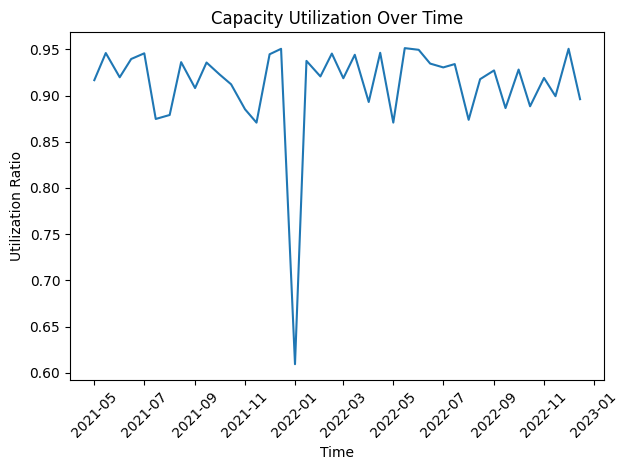

In [21]:
# -------------------------------
# Capacity Utilization Over Time
# -------------------------------
# Create utilization feature (if not already created)
df["capacity_utilization"] = df["usage_units"] / df["provisioned_capacity"]

# Select one region & service dynamically (safe filtering)
region_name = df["region"].iloc[0]
service_name = df["service_type"].iloc[0]

subset = df[(df["region"] == region_name) &
            (df["service_type"] == service_name)]

print("Subset shape:", subset.shape)

plt.figure()
plt.plot(subset["time_stamp"], subset["capacity_utilization"])
plt.title("Capacity Utilization Over Time")
plt.xlabel("Time")
plt.ylabel("Utilization Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()